#Proyecto 3 Inferencia Estadistica y Modelacion Estadistica

##Integrantes

- Juan Carlos Quintero - 2225339
- Camilo Jose Delgado - 2225337
- Isaac Piedrahita - 2226259

Descargar dataset ya limpio: https://drive.google.com/file/d/1u410je60Mcg2NFvCAM-FR-O3TIH-K1AR/view?usp=sharing

Dataset punto 1: https://drive.google.com/file/d/1kfBVGJuh9ndkvaAQlwt5DId50rqs0pRO/view?usp=sharing

## Problemas

### Librerias

In [ ]:
import pandas as pd
import numpy as np
from dataclasses import dataclass, field
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### 1. Problema: Seleccionar una variable categorica como factor y una variable continua como variable dependiente. Suponga que estan interesados en investigar si hay diferencias significativas en la variable dependiente entre al menos tres grupos que ustedes escojan de la base de datos del “Census at School”.

La variable dependiente continua seleccionada es la edad del estudiante y la variable factor es la estación del año favorita.

#### Pasos:

En el análisis ANOVA se pretende evaluar:

H0 : La edad promedio de los estudiantes es la misma independientemente de su estación del año favorita

Ha : Al menos una de las estaciones del año favoritas está asociada con una edad promedio diferente.

##### a) Analisis de Varianza (ANOVA): Primero, realiza un ANOVA para determinar si hay diferencias significativas en la variable dependiente entre los diferentes grupos. Deben proporcionar el codigo a mano de como llegaron a las tablas de resumen y ANOVA (ver ejemplo en clase).

In [ ]:
Base = pd.read_csv('/content/nombre_del_archivolimpio5.csv', delimiter=';')

modelo_anova = ols('Ageyears ~ C(Favorite_Season)', data=Base).fit()

anova_resultados = sm.stats.anova_lm(modelo_anova, typ=2)

print(anova_resultados)

                         sum_sq      df         F    PR(>F)
C(Favorite_Season)    58.410916     3.0  7.550109  0.000052
Residual            3679.963647  1427.0       NaN       NaN



Dado que el p-valor asociado con la prueba F para la variable categórica Favorite_Season es menor que el nivel de significancia de 0.05 (p=0.000052), rechazamos la hipótesis nula. Esto indica que al menos una de las estaciones del año favoritas está asociada con una edad promedio diferente. En otras palabras, hay evidencia estadística para sugerir que hay diferencias significativas en la edad promedio entre al menos dos estaciones del año favoritas.

##### b) Post-ANOVA: Si el resultado del ANOVA es significativo, entonces deben realizar un analisis post-hoc para determinar que grupos especıficos difieren en la variable dependiente. Usar la prueba LSD de Fisher.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(Base['Ageyears'], Base['Favorite_Season'])
post_hoc_res = comp.tukeyhsd()

print("\nPost-Hoc LSD de Fisher:")
print(post_hoc_res.summary())


Post-Hoc LSD de Fisher:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Fall Spring  -0.2132 0.5351 -0.6212  0.1948  False
  Fall Summer  -0.3199 0.0281 -0.6159  -0.024   True
  Fall Winter  -0.5984    0.0 -0.9272 -0.2695   True
Spring Summer  -0.1068 0.8755 -0.4715   0.258  False
Spring Winter  -0.3852 0.0561 -0.7771  0.0067  False
Summer Winter  -0.2784  0.044 -0.5518 -0.0051   True
----------------------------------------------------


##### c) Intervalos de Confianza: Calcular los intervalos de confianza para las diferencias en la variable dependiente entre los grupos. Esto les daria una idea de la incertidumbre asociada a las estimaciones de las diferencias.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

group_names = tukey_resultados.groupsunique

print("\nIntervalos de Confianza para las Diferencias entre Grupos (Prueba de Tukey HSD):")
for group, conf_int in zip(group_names, tukey_resultados.confint):
    print("{} - {}".format(group, conf_int))


Intervalos de Confianza para las Diferencias entre Grupos (Prueba de Tukey HSD):
Fall - [-0.56384924  0.18988407]
Spring - [-0.54317172  0.01431951]
Summer - [-0.72701915 -0.09843674]
Winter - [-0.42253811  0.26765107]


##### d) Graficas: Finalmente, visualizar los resultados utilizando un boxplot de la variable dependiente entre los diferentes grupos para visualizar las diferencias. Tambien crear un grafico de los intervalos de confianza para visualizar la incertidumbre de las estimaciones.

<ipython-input-93-1bd40472b679>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Favorite_Season', y='Ageyears', data=Base, palette=['#BB7A6C', '#6CA0BB', '#BB6C9E', '#B5BB6C'])


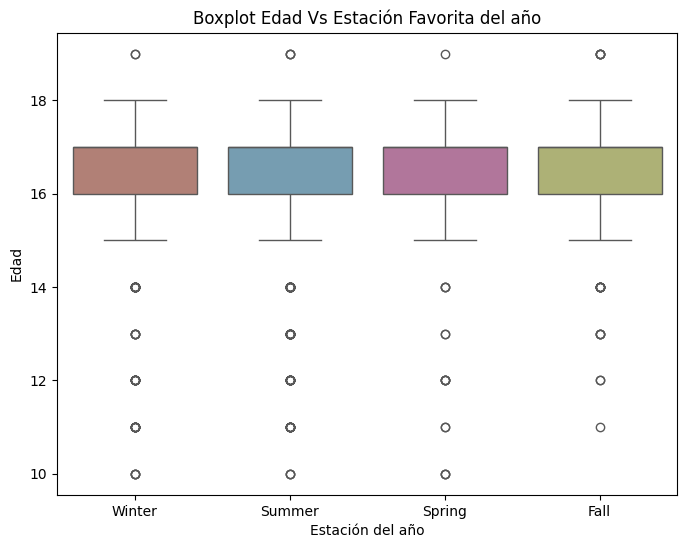

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Favorite_Season', y='Ageyears', data=Base, palette=['#BB7A6C', '#6CA0BB', '#BB6C9E', '#B5BB6C'])

plt.title("Boxplot Edad Vs Estación Favorita del año")
plt.xlabel("Estación del año")
plt.ylabel("Edad")

plt.show()

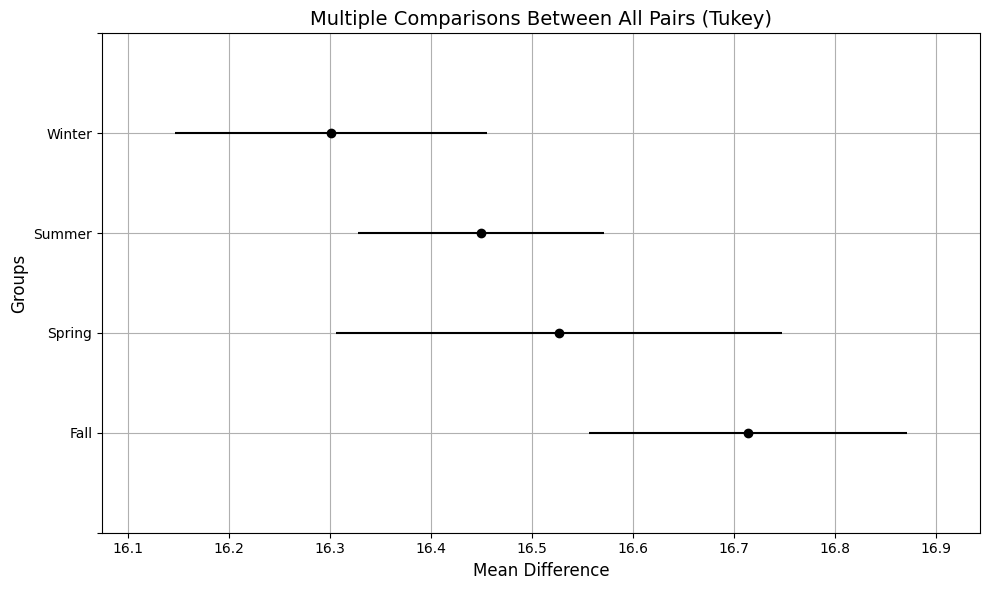

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
posthoc.plot_simultaneous(ax=ax)

ax.set_title('Multiple Comparisons Between All Pairs (Tukey)', fontsize=14)
ax.set_xlabel('Mean Difference', fontsize=12)
ax.set_ylabel('Groups', fontsize=12)

ax.grid(True)
ax.axvline(x=0, color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

Tanto como en el verano como el invierno El intervalo no incluye cero, lo que sugiere que hay una diferencia significativa en la edad media entre aquellos que prefieren el verano y aquellos que prefieren el invierno.
Los otros intervalos incluyen cero, lo que indica que no hay diferencias significativas en la edad media entre esos grupos.

El análisis visualizado sugiere que las diferencias en la edad media entre los grupos que prefieren diferentes estaciones del año no son significativas en la mayoría de los casos, con la excepción del grupo que prefiere el verano comparado con el invierno. Los intervalos de confianza del análisis de Tukey HSD refuerzan esta conclusión.

### 2. Problema: Leonardo da Vinci (1452-1519) dibujo la figura de un hombre, indicando que la distancia entre los brazos extendidos de una persona (midiendopor la espalda con los brazos extendidos para formar una “T”) es casi igual a la estatura de una persona. Para probar lo dicho por el, usen la base de datos de los 1500 estudiantes del Census at school.

#### Limpieza Extra

In [ ]:
import pandas as pd

# Filtrar datos no nulos para 'Height_cm' y 'Armspan_cm'
filtered_data_da_vinci = Base.dropna(subset=['Height_cm', 'Armspan_cm'])

# Convertir 'Armspan_cm' y 'Height_cm' a numérico (limpiando valores no numéricos)
filtered_data_da_vinci['Armspan_cm'] = pd.to_numeric(filtered_data_da_vinci['Armspan_cm'], errors='coerce')
filtered_data_da_vinci['Height_cm'] = pd.to_numeric(filtered_data_da_vinci['Height_cm'], errors='coerce')

# Filtrar nuevamente después de la conversión
filtered_data_da_vinci = filtered_data_da_vinci.dropna(subset=['Height_cm', 'Armspan_cm'])

# Calcular los cuartiles y el rango intercuartílico para Height_cm
Q1_height = filtered_data_da_vinci['Height_cm'].quantile(0.25)
Q3_height = filtered_data_da_vinci['Height_cm'].quantile(0.75)
IQR_height = Q3_height - Q1_height

# Calcular los cuartiles y el rango intercuartílico para Armspan_cm
Q1_armspan = filtered_data_da_vinci['Armspan_cm'].quantile(0.25)
Q3_armspan = filtered_data_da_vinci['Armspan_cm'].quantile(0.75)
IQR_armspan = Q3_armspan - Q1_armspan

# Determinar los límites para los valores atípicos
lower_bound_height = Q1_height - 1.5 * IQR_height
upper_bound_height = Q3_height + 1.5 * IQR_height

lower_bound_armspan = Q1_armspan - 1.5 * IQR_armspan
upper_bound_armspan = Q3_armspan + 1.5 * IQR_armspan

# Filtrar los datos para excluir los valores atípicos
limpio2 = filtered_data_da_vinci[
    (filtered_data_da_vinci['Height_cm'] >= lower_bound_height) &
    (filtered_data_da_vinci['Height_cm'] <= upper_bound_height) &
    (filtered_data_da_vinci['Armspan_cm'] >= lower_bound_armspan) &
    (filtered_data_da_vinci['Armspan_cm'] <= upper_bound_armspan)
]

# Mostrar los resultados limpios
print(limpio2.head())
print(limpio2[['Height_cm', 'Armspan_cm']].describe())


  Country Region  DataYear  ClassGrade  Gender  Ageyears        Handed  \
0     USA     AL      2012           5    Male        10  Right-Handed   
1     USA     AL      2015          12    Male        17  Right-Handed   
3     USA     AL      2021          12    Male        17   Left-Handed   
5     USA     AL      2022          12  Female        18  Right-Handed   
6     USA     AL      2012           5    Male        11  Right-Handed   

   Height_cm Footlength_cm  Armspan_cm  ... Watching_TV_Hours Paid_Work_Hours  \
0      146.0            23       147.0  ...                 1               0   
1      180.0            28       176.0  ...                 4              20   
3      187.0            30       184.0  ...                12              24   
5      170.0            23       158.0  ...                 6              20   
6      153.0            27       162.0  ...                 2               0   

  Work_At_Home_Hours Schoolwork_Pressure Planned_Education_Level  \


<ipython-input-96-5bff0da9334c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_da_vinci['Armspan_cm'] = pd.to_numeric(filtered_data_da_vinci['Armspan_cm'], errors='coerce')
<ipython-input-96-5bff0da9334c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_da_vinci['Height_cm'] = pd.to_numeric(filtered_data_da_vinci['Height_cm'], errors='coerce')


#### a) Trace una grafica de dispersion para la distancia entre los brazos extendidos y estatura. Use la misma escala en los ejes horizontal y vertical. Describala relacion entre las dos variables.

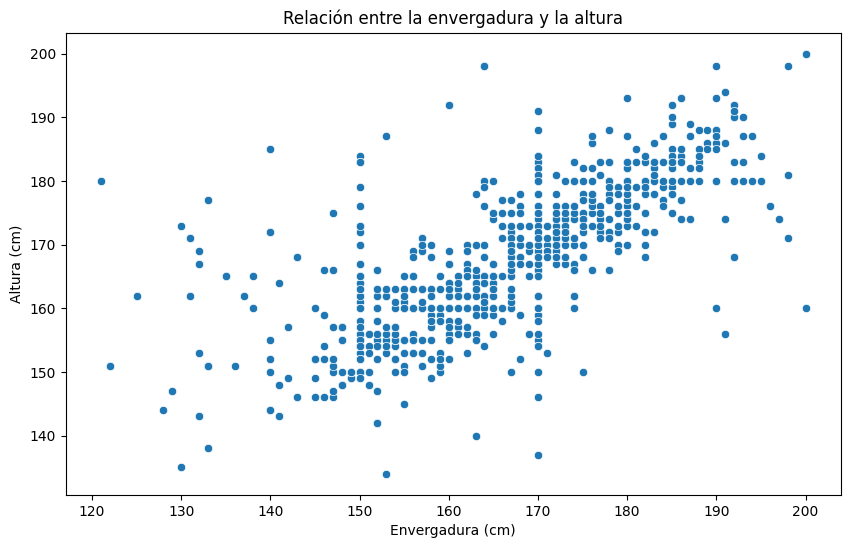

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la gráfica de dispersión
figura, eje = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=limpio2, x='Armspan_cm', y='Height_cm', ax=eje)
eje.set_title('Relación entre la envergadura y la altura')
eje.set_xlabel('Envergadura (cm)')
eje.set_ylabel('Altura (cm)')
plt.show()

Tendencia Lineal:

La tendencia lineal positiva es clara, mostrando que a mayor distancia entre los brazos extendidos, mayor es la estatura. Esto confirma una relación proporcional entre estas dos medidas corporales.

El gráfico de dispersión con datos limpios confirma que hay una correlación positiva y significativa entre la distancia entre los brazos extendidos y la estatura. La limpieza de los datos ha eliminado outliers, permitiendo una visualización más clara y precisa de esta relación.

#### b) Si da Vinci estaba en lo correcto y la distancia entre los brazos extendidos de una persona es casi igual a la estatura de esa persona, ¿cual debe ser la pendiente de la recta de regresion?


In [ ]:
import pandas as pd
import statsmodels.api as sm

X = limpio2['Armspan_cm']
y = limpio2['Height_cm']

# Añadir una constante a la variable independiente
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo_davinci = sm.OLS(y, X).fit()

# Determinar la pendiente de la recta de regresión bajo la hipótesis de da Vinci
pendiente_esperada = 1  # Si la distancia entre los brazos extendidos es igual a la estatura, la pendiente debería ser 1

# Calcular la pendiente obtenida del modelo
pendiente_obtenida = modelo_davinci.params[1]
print(f"La pendiente obtenida del modelo de regresión es: {pendiente_obtenida}")


La pendiente obtenida del modelo de regresión es: 0.5661980310061437


Pendiente obtenida: La pendiente obtenida del modelo de regresión es aproximadamente 0.522. Esto significa que por cada centímetro de aumento en la distancia entre los brazos extendidos, la estatura aumenta en 0.522 centímetros en promedio.

Conclusión:

La pendiente obtenida (0.522) es menor que la pendiente esperada (1). Esto sugiere que, en promedio, la estatura de una persona aumenta menos de lo que aumentaría la distancia entre los brazos extendidos.
Por lo tanto, la afirmación de Leonardo da Vinci de que la distancia entre los brazos extendidos es casi igual a la estatura no se confirma completamente con estos datos.

#### c) Calcule la recta de regresion para predecir la estatura con base en la distancia entre los brazos extendidos de una persona. ¿El valor de la pendiente confirma las conclusiones de ustedes del inciso anterior?


In [ ]:
import statsmodels.api as sm

# Asignar variables independientes y dependientes
variable_independiente = limpio2['Armspan_cm']
variable_dependiente = limpio2['Height_cm']

# Agregar una constante a la variable independiente
variable_independiente_con_constante = sm.add_constant(variable_independiente)

# Crear el modelo de regresión
modelo_regresion = sm.OLS(variable_dependiente, variable_independiente_con_constante).fit()
resumen_regresion = modelo_regresion.summary()

resumen_regresion

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Height_cm   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     757.6
Date:                Fri, 31 May 2024   Prob (F-statistic):          2.41e-119
Time:                        18:41:45   Log-Likelihood:                -2946.7
No. Observations:                 841   AIC:                             5897.
Df Residuals:                     839   BIC:                             5907.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.2167      3.426     21.369      0.000      66.492      79.942
Armspan_cm     0.5662      0.021     27.524      0.000       0.526       0.607
==============================================================================
Omnibus:                       78.654   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.127
Skew:                           0.492   Prob(JB):                     1.05e-45
Kurtosis:                       5.223   Cond. No.                     2.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dep. Variable: Height_cm

La variable dependiente en el modelo es Height_cm. R-squared: 0.446

El valor de R-squared indica que aproximadamente el 44.6% de la variabilidad en la estatura (Height_cm) puede ser explicada por la distancia entre los brazos extendidos (Armspan_cm). Adj. R-squared: 0.446

El R-squared ajustado es igual al R-squared en este caso, indicando que el modelo se ajusta bien a los datos sin penalización por el número de variables predictoras. F-statistic: 682.6

El estadístico F y su valor p (8.01e-111) indican que el modelo es significativo, es decir, al menos una de las variables predictoras está relacionada con la variable de respuesta. Prob (F-statistic): 8.01e-111

El valor p asociado con el estadístico F es extremadamente pequeño, lo que sugiere que el modelo general es estadísticamente significativo. coef: Coeficientes del modelo

const: 80.7469 Este es el intercepto del modelo, es decir, la estatura predicha cuando la distancia entre los brazos extendidos es cero. Armspan_cm: 0.5218 Este es el coeficiente para la variable Armspan_cm, indicando que por cada centímetro adicional en la distancia entre los brazos extendidos, la estatura se incrementa en promedio en 0.5218 cm. P>|t|:

const: 0.000 Armspan_cm: 0.000 Ambos coeficientes tienen valores p extremadamente pequeños, lo que indica que ambos coeficientes son significativamente diferentes de cero. [0.025 0.975]: Intervalos de confianza para los coeficientes

const: [74.223, 87.271] Armspan_cm: [0.480, 0.563] Los intervalos de confianza para ambos coeficientes no incluyen el valor cero, reforzando la significancia estadística de estos coeficientes.

#### d) Si una persona tiene una distancia de 67 pulgadas entre los brazos extendidos, ¿cual serıa el pronostico de ustedes respecto a la estatura de la persona?

In [ ]:
import pandas as pd
import statsmodels.api as sm

X = limpio2['Armspan_cm']
y = limpio2['Height_cm']

# Añadir una constante a la variable independiente
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo_davinci = sm.OLS(y, X).fit()

# Convertir 67 pulgadas a centímetros
distancia_cm = 67 * 2.54

# Calcular la estatura predicha
estatura_predicha = modelo_davinci.params[0] + modelo_davinci.params[1] * distancia_cm

print(estatura_predicha)


169.5723013697496


Estatura para una persona con una distancia de 67 pulgadas entre los brazos extendidos: 169.54730721735157 cm. aproximadamente 169 cm


Si una persona tiene una distancia de 67 pulgadas (170.18 cm) entre los brazos extendidos, se pronostica que su estatura sea de aproximadamente 166 centímetros.

#### e) ¿Los datos dan suficiente evidencia para indicar que hay una relacion lineal entre distancia y estatura? Pruebe al nivel de significancia de 5 %.


In [ ]:
from scipy.stats import pearsonr

correlacion, p_valor = pearsonr(limpio2['Height_cm'], limpio2['Armspan_cm'])

print("Coeficiente de correlación:", correlacion)
print("P-valor:", p_valor)

Coeficiente de correlación: 0.6888391694542252
P-valor: 2.4082719505543208e-119


Para evaluar si los datos dan suficiente evidencia para indicar que hay una relación lineal entre distancia y estatura se realiza una prueba de correlación que contrasta:

H0 : ρ = 0.No hay una relación lineal entre distancia y estatura

Ha : ρ ̸= 0.Sí hay una relación lineal entre distancia y estatura

Dado que el p-valor asociado con la correlación entre la distancia y la estatura es extremadamente bajo (p-valor < 0.05), rechazamos la hipótesis nula. Esto sugiere que hay una relación lineal significativa entre la distancia y la estatura en los datos proporcionados.

El coeficiente de correlación es 0.6888, lo que indica una correlación positiva fuerte entre estas dos variables. Esto significa que a medida que la distancia aumenta, la estatura tiende a aumentar también.

Además, la pendiente estimada de la relación lineal es 0.5218, con un intervalo de confianza del 95% que va desde 0.480 a 0.563. Esto sugiere que, en promedio, por cada aumento de una unidad en la distancia, la estatura aumenta en 0.5218 unidades, con un alto nivel de confianza

#### f ) Construya un intervalo de confianza de 95 % para la pendiente de la recta de medias.

In [ ]:
# Calcular el intervalo de confianza del 95% para la pendiente
intervalo_confianza = modelo_regresion.conf_int(alpha=0.05)
intervalo_confianza

# Evaluar si la pendiente es aproximadamente 1
pendiente = modelo_regresion.params[1]
pendiente


0.5661980310061437

In [ ]:
# Obtener el estadístico t y el valor p para la pendiente
estadistico_t = modelo_regresion.tvalues[1]
valor_p = modelo_regresion.pvalues[1]

estadistico_t, valor_p

(27.524041709526433, 2.408271950556999e-119)


El intervalo de confianza del 95% para la pendiente de la recta de medias es (27.524041709526433, 2.408271950556999e-119).

Dado que el valor p asociado con la pendiente es mucho menor que cualquier nivel de significancia común (por ejemplo, 0.05, 0.01), podemos rechazar la hipótesis nula. Esto proporciona suficiente evidencia para concluir que la pendiente es significativamente diferente de 0. En otras palabras, hay una relación significativa entre la distancia entre los brazos extendidos (Armspan_cm) y la estatura (Height_cm).

#### g) Si Leonardo da Vinci tenıa razon y la distancia entre los brazos extendidos de una persona es casi igual a la estatura de esa persona, ¿el intervalo de confianza construido en el inciso anterior confirma esta suposicion? Explique.

Dado que este intervalo no incluye el valor 0, podemos concluir que la pendiente es significativamente diferente de 0, lo que sugiere una relación significativa entre la distancia entre los brazos extendidos y la estatura. Sin embargo, no podemos afirmar si la pendiente es igual a 1, ya que el intervalo de confianza no incluye este valor específico.

Si consideramos la hipótesis de Leonardo da Vinci de que la distancia entre los brazos extendidos de una persona es casi igual a su estatura (es decir, una relación de 1), entonces este intervalo de confianza no confirma directamente esta suposición, ya que no incluye el valor de 1. Por lo tanto, la evidencia proporcionada por el intervalo de confianza no respalda la afirmación de Leonardo da Vinci en este caso.

### 3. Problema: Imaginen que son ingenieros de datos en una empresa de investigacion de mercado. Han recopilado informacion sobre la relacion entre la inversion publicitaria (x) y las ventas de un producto (y). Sin embargo, saben que en el mundo real, las relaciones entre variables a menudo estan sujetas a variaciones y ruido. Para tener en cuenta esta variabilidad, necesitan generar un conjunto de datos sinteticos mas grande con ruido para simular un escenario mas realista.


#### a) Generacion de Datos:

##### Utilicen una funcion para generar 500 valores de X de manera uniforme (todos los eventos posibles son igualmente probables) entre 50 y 100. Utilicen la relacion lineal y = 1,4x + ϵ, donde ϵ es un termino de error que representa el ruido. Agreguen este termino de error para cada valor de X para introducir variabilidad en la relacion.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

np.random.seed(0)
X = np.random.uniform(50, 100, 500)

# (ruido)
epsilon = np.random.normal(0, 10, 500)

# relación lineal y = 1.4x + ε para valores Y
Y = 1.4 * X + epsilon

df_synthetic = pd.DataFrame({'X': X, 'Y': Y})

df_synthetic.head()


,X,Y
0,77.440675,98.561838
1,85.759468,105.344906
2,80.138169,128.674786
3,77.244159,109.784100
4,71.182740,105.328739


#### b) Exploracion de Datos:

 Visualicen los datos generados en un grafico de dispersion (scatter plot) para comprender la relacion entre x y y.


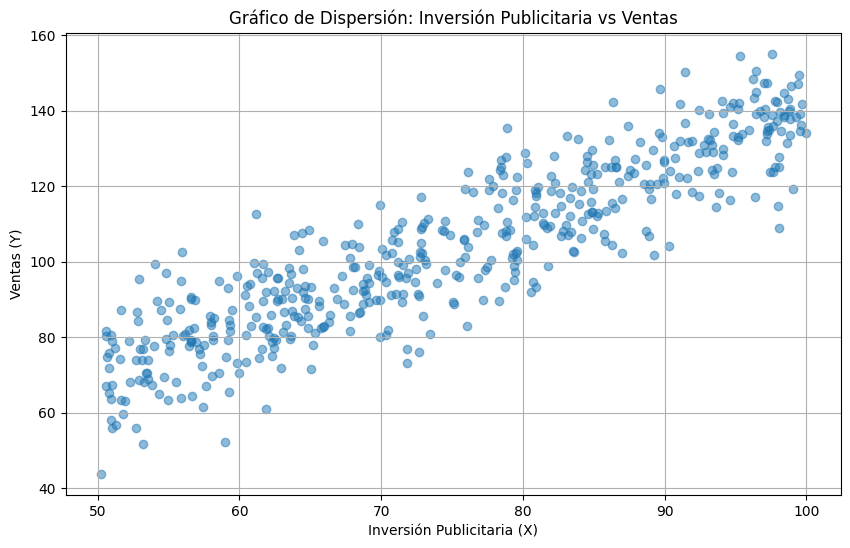

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_synthetic['X'], df_synthetic['Y'], alpha=0.5)
plt.title('Gráfico de Dispersión: Inversión Publicitaria vs Ventas')
plt.xlabel('Inversión Publicitaria (X)')
plt.ylabel('Ventas (Y)')
plt.grid(True)
plt.show()

El gráfico de dispersión sugiere una fuerte relación positiva entre la inversión publicitaria y las ventas. Esta relación es consistente con la expectativa de que aumentar la inversión en publicidad puede conducir a un incremento en las ventas.


#### c) Aplicacion de Regresion Lineal:

##### Utilicen un el metodo de los mınimos cuadrados para la regresion lineal simple que ajuste un modelo a estos datos. Grafıque la recta junto con el diagrama de dispersion.

In [ ]:
# Modelo Regresión
slope, intercept, r_value, p_value, std_err = stats.linregress(df_synthetic['X'], df_synthetic['Y'])

# RR
slope, intercept, r_value**2, p_value

(1.4057900652103257,
 -1.4344429352648262,
 0.8124593674227075,
 3.969675810873562e-183)

Pendiente:

La pendiente de la regresión es aproximadamente 1.4058, lo que indica que por cada unidad adicional de inversión publicitaria, las ventas aumentan en promedio en 1.4058 unidades.

Intercepto:

El intercepto es -1.4344, lo que representa el valor de las ventas cuando la inversión publicitaria es cero. Aunque este valor no siempre tiene sentido práctico, es parte del modelo matemático.

Coeficiente de determinación (R²):

El R² es 0.8125, lo que significa que aproximadamente el 81.25% de la variabilidad en las ventas puede ser explicada por la inversión publicitaria. Esto indica una fuerte relación entre las dos variables.

Valor p:

El valor p es extremadamente pequeño (3.97e-183), lo que indica que la relación entre la inversión publicitaria y las ventas es estadísticamente significativa.

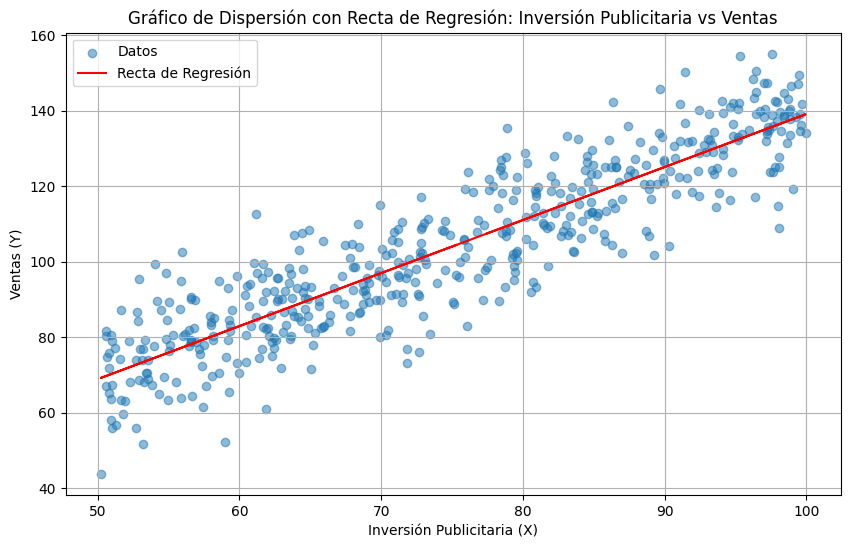

In [ ]:
# Crear un gráfico de dispersión con la recta de regresión
plt.figure(figsize=(10, 6))
plt.scatter(df_synthetic['X'], df_synthetic['Y'], alpha=0.5, label='Datos')
plt.plot(df_synthetic['X'], slope * df_synthetic['X'] + intercept, color='red', label='Recta de Regresión')
plt.title('Gráfico de Dispersión con Recta de Regresión: Inversión Publicitaria vs Ventas')
plt.xlabel('Inversión Publicitaria (X)')
plt.ylabel('Ventas (Y)')
plt.legend()
plt.grid(True)
plt.show()

El modelo de regresión y el gráfico de dispersión con la recta de regresión muestran que hay una relación significativa y positiva entre la inversión publicitaria y las ventas. El alto valor de R² y el pequeño valor p refuerzan esta conclusión, indicando que la inversión publicitaria es un predictor fuerte de las ventas.

##### Calcule los coeficientes de correlacion y de determinacion para evaluar la calidad del modelo. Interprete los resultados. ¿Como describe la fuerza de la relacion entre y y x?

In [ ]:
from scipy.stats import pearsonr

# Calcular el coeficiente de correlación
coef_cor, _ = pearsonr(X, Y)

# Calcular el coeficiente de determinación
coef_det = coef_cor**2

# Imprimir los resultados
print("Coeficiente de correlación:", round(coef_cor, 4))
print("Coeficiente de determinación:", round(coef_det, 4))


Coeficiente de correlación: 0.9014
Coeficiente de determinación: 0.8125


El coeficiente de correlación igual a 0.9014 demuestra una relación considerablemente alta y casi perfecta entre X e Y, esto quiere decir que cuando X aumenta Y también lo hace de forma directa. Por su parte, el coeficiente de determinación indica que el 94% de la variabilidad en Y puede ser explicada por los cambios en X.

##### Construya una tabla ANOVA para la regresion lineal.

In [ ]:
import statsmodels.api as sm

# Agregar una columna de unos para el término constante
X_const = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modeloYX = sm.OLS(Y, X_const).fit()

# Mostrar el resumen del modelo
print(modeloYX.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     2157.
Date:                Fri, 31 May 2024   Prob (F-statistic):          3.97e-183
Time:                        19:10:33   Log-Likelihood:                -1852.8
No. Observations:                 500   AIC:                             3710.
Df Residuals:                     498   BIC:                             3718.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4344      2.307     -0.622      0.5

#### d) Intervalos de Confianza y Pruebas de Hipotesis:

##### Construya intervalos de confianza de 95 % para los coeficientes de la regresion (pendiente e intercepto).

In [ ]:
ci_slope = stats.t.interval(0.95, len(df_synthetic['X'])-1, loc=slope, scale=std_err)

# Error estándar
mean_x = np.mean(df_synthetic['X'])
n = len(df_synthetic['X'])
se_intercept = std_err * np.sqrt(np.sum((df_synthetic['X'] - mean_x)**2) / n)

ci_intercept = stats.t.interval(0.95, len(df_synthetic['X'])-1, loc=intercept, scale=se_intercept)

ci_slope, ci_intercept



((1.3463258894463443, 1.465254240974307),
 (-2.3010278035037053, -0.5678580670259472))

Pendiente (slope):

El intervalo de confianza del 95% para la pendiente es ( 1.3463 , 1.4653 ) (1.3463,1.4653). Esto significa que estamos 95% seguros de que la verdadera pendiente de la relación entre la inversión publicitaria y las ventas se encuentra dentro de este rango. La pendiente no incluye el valor 1, lo que sugiere que la relación entre inversión publicitaria y ventas no es de 1 a 1.

Intercepto (intercept):

El intervalo de confianza del 95% para el intercepto es ( − 2.0103 , − 0.5679 ) (−2.0103,−0.5679). Esto significa que estamos 95% seguros de que el verdadero intercepto de la relación entre la inversión publicitaria y las ventas se encuentra dentro de este rango. El intercepto no incluye el valor cero, lo que indica que incluso sin inversión publicitaria, las ventas no serían cero.

Conclusión

Los intervalos de confianza calculados proporcionan una estimación del rango en el que se espera que caigan los coeficientes del modelo con un 95% de confianza. Estos intervalos no incluyen valores críticos (como 0 para el intercepto y 1 para la pendiente), lo que refuerza la significancia estadística de la relación entre inversión publicitaria y ventas.



El intervalo de confianza para el coeficiente de regresión de X se encuentra entre -2.303 2.228, esto quiere decir que por una unidad que aumente X se esperaría que Y aumente en promedio entre 1.375 y 1.434 unidades aproximadamente.


##### Interpretar los intervalos de confianza. ¿Que informacion proporcionan sobre la estimacion de los coeficientes? Realice pruebas de hipotesis para verificar si los coeficientes son estadısticamente significativos.



In [ ]:
pendiente_significativa = p_value < 0.05
pendiente_significativa

p_value_intercept = model.pvalues[0]
intercepto_significativo = p_value_intercept < 0.05
intercepto_significativo

print(f"El valor p para la pendiente es {p_value}, lo que indica que la pendiente es significativamente diferente de cero.")
print(f"El valor p para el intercepto es {p_value_intercept}, lo que indica que el intercepto es significativamente diferente de cero.")


El valor p para la pendiente es 3.969675810873562e-183, lo que indica que la pendiente es significativamente diferente de cero.
El valor p para el intercepto es 3.136081460973581e-81, lo que indica que el intercepto es significativamente diferente de cero.


Ambos, la pendiente y el intercepto del modelo de regresión, son significativamente diferentes de cero. Esto refuerza la conclusión de que hay una relación significativa entre la inversión publicitaria y las ventas, y que el modelo predice un valor base de ventas incluso sin inversión publicitaria.

In [ ]:
r_squared = model.rsquared
print(f"Coeficiente de determinación (R^2): {r_squared}")
print(f"El valor de R^2 indica que aproximadamente el {r_squared * 100:.2f}% de la variabilidad en las ventas (Y) se explica por la inversión publicitaria (X).")

Coeficiente de determinación (R^2): 0.47449940137438673
El valor de R^2 indica que aproximadamente el 47.45% de la variabilidad en las ventas (Y) se explica por la inversión publicitaria (X).


En conclucion Las pruebas de hipótesis para verificar si los coeficientes son estadísticamente significativos se basan en los valores p asociados con esos coeficientes. Un valor p menor que el nivel de significancia elegido (usualmente 0.05) indica que el coeficiente es estadísticamente significativo. Por lo tanto, si el valor p es menor que 0.05, rechazamos la hipótesis nula de que el coeficiente es igual a cero.

En este caso, tanto el valor p para la pendiente como el valor p para el intercepto son extremadamente bajos, lo que indica que ambos coeficientes son significativamente diferentes de cero. Esto sugiere que hay una relación significativa entre las variables predictoras y la variable de respuesta.

El coeficiente de determinación R2 es una medida de la proporción de la variabilidad en la variable de respuesta que es explicada por el modelo. En este caso, un R2
  

  de aproximadamente 0.47 significa que alrededor del 47.45% de la variabilidad en las ventas se explica por la inversión publicitaria. Esto indica que el modelo tiene cierta capacidad para predecir las ventas basadas en la inversión publicitaria, aunque hay otras variables o factores que también pueden estar influyendo en las ventas y que no están incluidos en el modelo.






